# Notebook to show TF binding site correlation overlayed with network clusters

## Imports

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load motif correlation matrix

In [138]:
corr = pd.read_csv('Collection.matrix', sep = '\t', index_col = 0)

In [139]:
corr.head()

,AHR_1.motif,AIRE_1.motif,ALX1_2.motif,ALX3_1.motif,ALX3_2.motif,ALX4_1.motif,AR_1.motif,ARID2_1.motif,ARID3A_2.motif,ARID3B_1.motif,...,ZSCAN31_1.motif,ZSCAN32_1.motif,ZSCAN4_1.motif,ZSCAN5A_1.motif,ZSCAN5B_1.motif,ZSCAN5D_1.motif,ZSCAN9_1.motif,ZXDA_1.motif,ZXDB_1.motif,ZXDC_1.motif
Motif Comparison,,,,,,,,,,,,,,,,,,,,,
AHR_1.motif,1.000000,0.153698,0.056808,0.085136,0.060697,0.073816,0.144639,0.178622,0.085552,0.134861,...,0.132939,0.325173,0.346617,0.361074,0.126023,0.303319,0.244267,0.243751,0.243751,0.240212
AIRE_1.motif,0.153698,1.000000,0.357059,0.305054,0.332397,0.337785,0.318219,0.313333,0.370310,0.328540,...,0.379372,0.252485,0.254023,0.272882,0.280534,0.224594,0.483184,0.423110,0.423110,0.429939
ALX1_2.motif,0.056808,0.357059,1.000000,0.757442,0.987754,0.984651,0.131111,0.280582,0.645925,0.608710,...,0.342317,0.232504,0.173016,0.472252,0.430449,0.146278,0.337514,0.184657,0.184657,0.175008
ALX3_1.motif,0.085136,0.305054,0.757442,1.000000,0.700957,0.699341,0.150437,0.330413,0.800153,0.748309,...,0.488042,0.263421,0.215292,0.353639,0.354144,0.151880,0.356010,0.232322,0.232322,0.221603
ALX3_2.motif,0.060697,0.332397,0.987754,0.700957,1.000000,0.998375,0.118468,0.290941,0.623493,0.583314,...,0.310886,0.238741,0.181884,0.466851,0.426992,0.127551,0.327673,0.183741,0.183741,0.174290


## Load network metadata

In [140]:
#Load network features from Gephi output
network_stats = pd.read_csv('../data/Network_stats.csv')

In [141]:
network_stats.index = [x.strip('(+)') for x in network_stats.Id]

In [142]:
network_stats.head()

,Id,Label,timeset,0,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub,modularity_class,pageranks,componentnumber,clustering,triangles,eigencentrality
Arid3a,Arid3a(+),Arid3a(+),NaN,[4],24,24,4,0.451697,0.511561,152.433156,0.072535,0.072536,0,0.005728,0,0.518116,143,0.521760
Bach1,Bach1(+),Bach1(+),NaN,[1],23,23,4,0.429280,0.491811,97.848004,0.073941,0.073941,0,0.005506,0,0.478261,121,0.526312
Cebpa,Cebpa(+),Cebpa(+),NaN,[1],18,18,4,0.443590,0.494701,394.808639,0.038221,0.038221,0,0.004748,0,0.333333,51,0.295813
Cebpb,Cebpb(+),Cebpb(+),NaN,[1],31,31,4,0.451697,0.526975,222.112114,0.109525,0.109522,1,0.006924,0,0.492473,229,0.817560
Cebpd,Cebpd(+),Cebpd(+),NaN,[1],28,28,4,0.475275,0.537572,886.215782,0.090919,0.090917,1,0.006413,0,0.420635,159,0.697145


## Map motifs to regulons

In [143]:
def find_matches(TF):
    return corr.index[[TF.upper() in x for x in corr.index]].tolist()

In [144]:
def create_matrix(network):
    TF_motif = []
    for TF in network_stats.index.tolist():
        motifs = find_matches(TF)
        #if motifs is not None:
        for motif in motifs:
            TF_motif.append([motif, TF, network_stats.loc[TF]['0'][1]])
            
    return TF_motif
        
    

In [145]:
len(TF_motif)

242

In [146]:
TF_motif = pd.DataFrame(create_matrix(network_stats), columns = ['Motif', 'TF', 'Cluster'])

In [147]:
TF_motif.index = TF_motif.Motif

In [148]:
corr_sub = corr.loc[TF_motif.sort_values('Cluster').Motif, TF_motif.sort_values('Cluster').Motif]

In [149]:
corr_sub.shape

(242, 242)

In [150]:
corr_sub.head()

,MAFG_1.motif,IRF1_1.motif,TFE3_1.motif,ETS2_1.motif,ELK3_1.motif,STAT3_1.motif,TGIF1_2.motif,CREM_1.motif,TGIF1_1.motif,FOXO1_1.motif,...,KLF15_1.motif,KLF14_1.motif,KLF13_1.motif,KLF12_2.motif,KLF12_1.motif,KLF1_1.motif,PBX3_1.motif,ATF7_1.motif,SOX21_4.motif,PKNOX1_1.motif
Motif Comparison,,,,,,,,,,,,,,,,,,,,,
MAFG_1.motif,1.000000,0.124547,0.263563,0.251222,0.237640,0.139520,0.264295,0.235551,0.289246,0.341524,...,0.177950,0.233833,0.209684,0.202547,0.311147,0.266895,0.308038,0.186582,0.226292,0.223103
IRF1_1.motif,0.124547,1.000000,0.256427,0.442940,0.391609,0.284448,0.286689,0.218400,0.369891,0.496176,...,0.108790,0.096207,0.236033,0.071877,0.181872,0.147455,0.208707,0.156883,0.318850,0.296461
TFE3_1.motif,0.263563,0.256427,1.000000,0.292504,0.335410,0.183195,0.541025,0.479762,0.475636,0.296890,...,0.267519,0.396734,0.366355,0.376365,0.441151,0.296247,0.340394,0.462571,0.321562,0.530996
ETS2_1.motif,0.251222,0.442940,0.292504,1.000000,0.871169,0.639657,0.190250,0.403283,0.245765,0.332203,...,0.427081,0.389715,0.396106,0.406290,0.357572,0.420857,0.231921,0.334740,0.328978,0.182669
ELK3_1.motif,0.237640,0.391609,0.335410,0.871169,1.000000,0.663180,0.209835,0.389905,0.224099,0.300037,...,0.308167,0.323200,0.317591,0.346334,0.350830,0.352361,0.296146,0.340969,0.258196,0.232657


In [151]:
corr_sub['Cluster'] =  TF_motif.sort_values('Cluster').Cluster.tolist()

In [152]:
corr_sub.Cluster = [int(x) for x in corr_sub.Cluster]

In [154]:
corr_sub.shape

(242, 243)

In [174]:
colors = {1: (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 2: (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 3: (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 4: (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 5: (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 6: (0.8, 0.8, 0.8)}

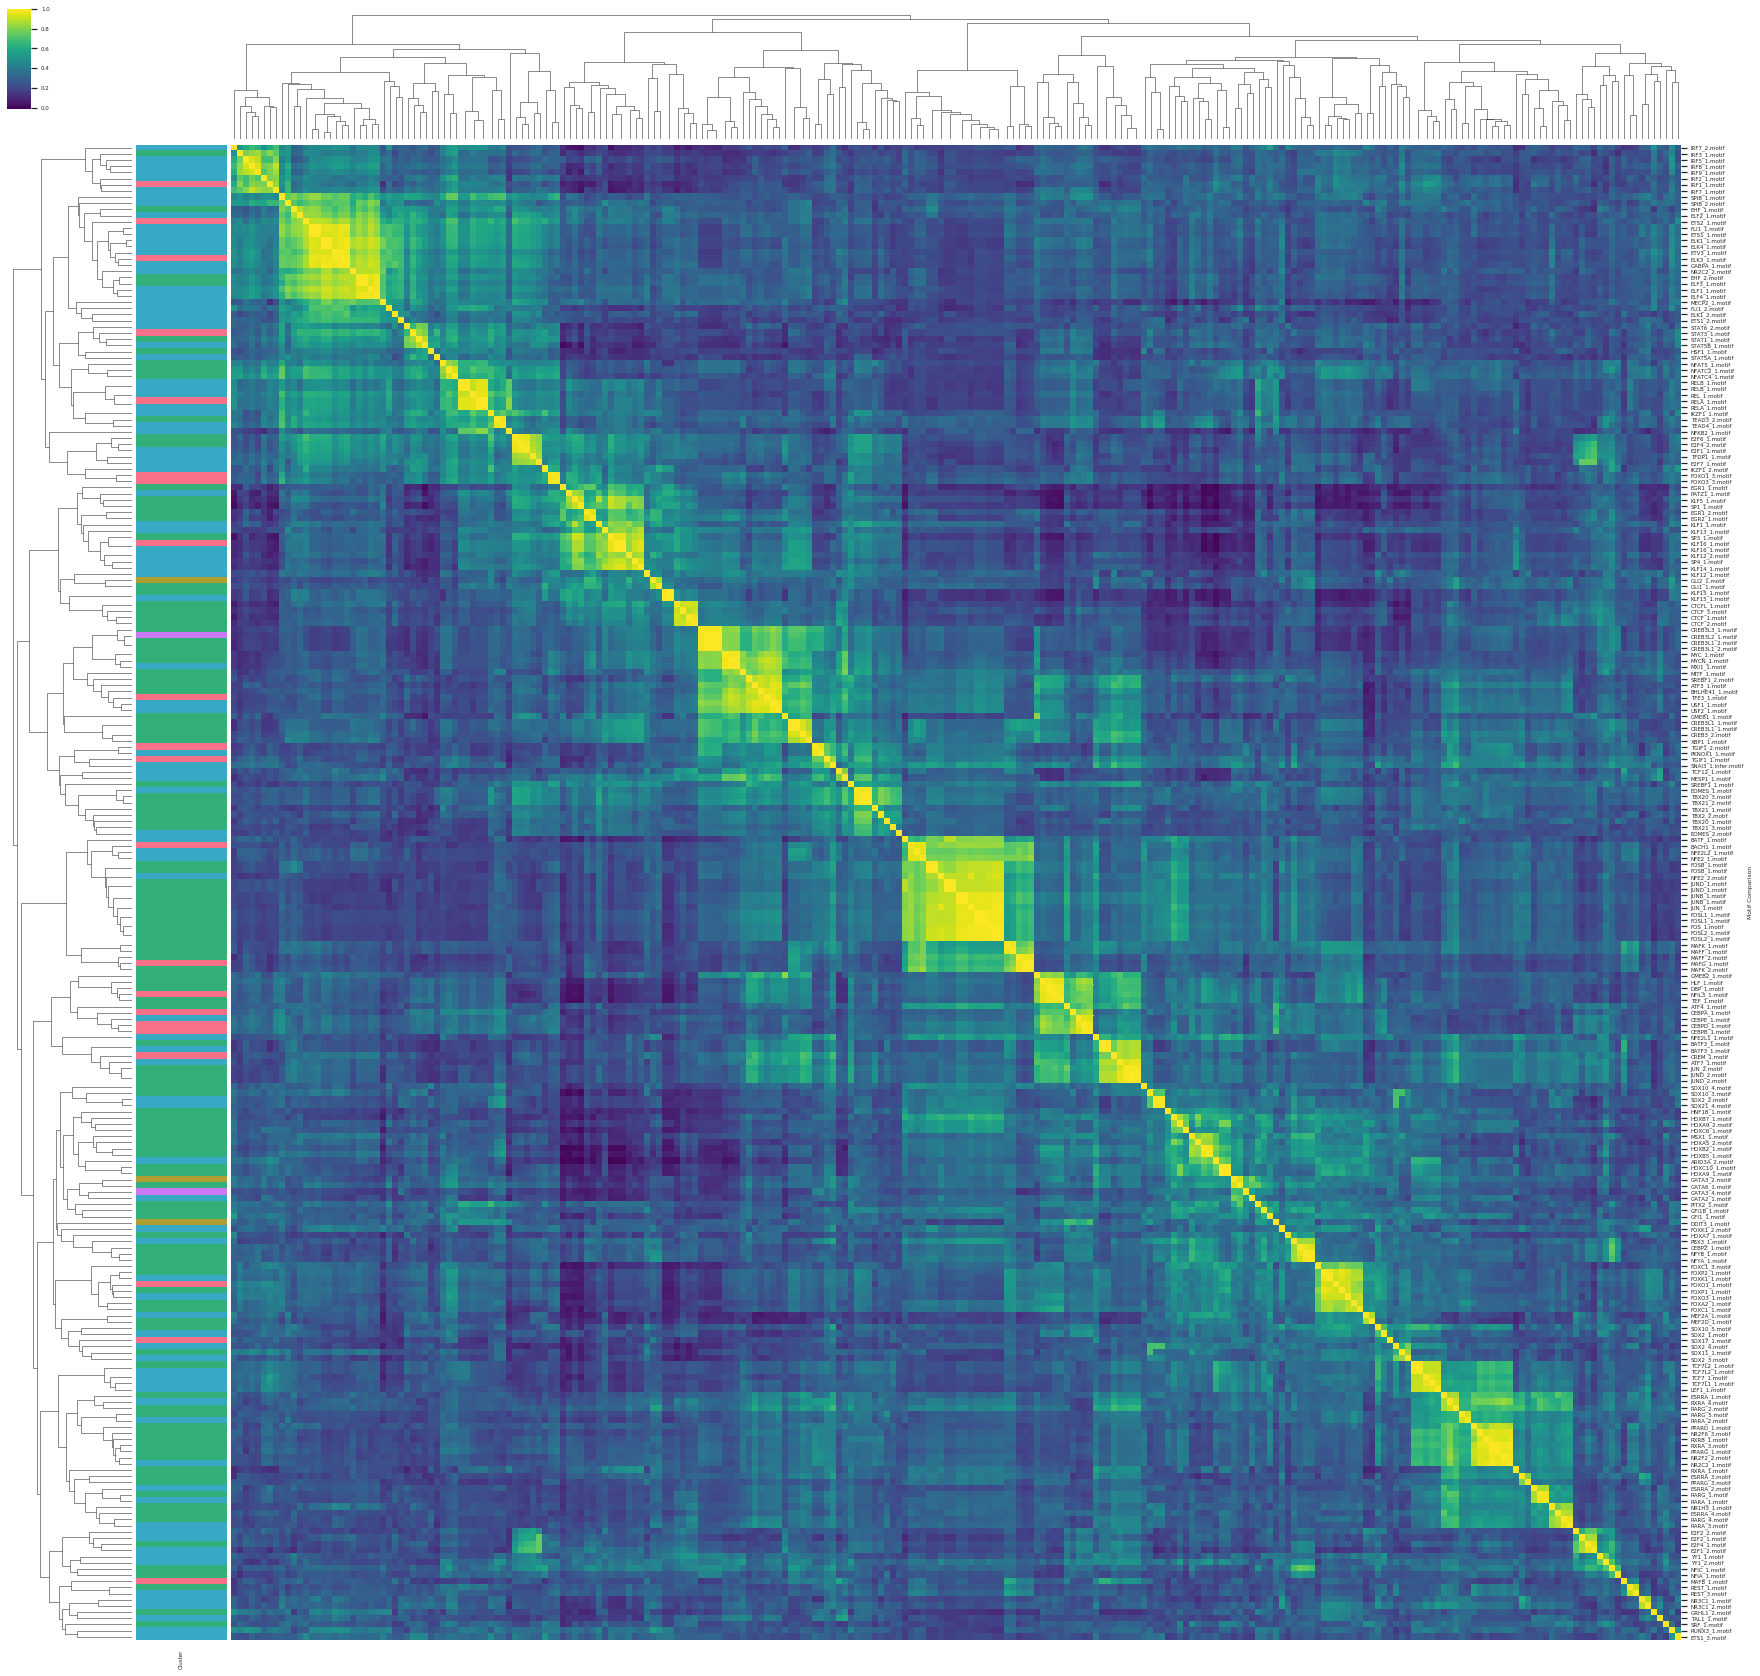

In [175]:
sns.set(font_scale=0.5)
sns.clustermap(corr_sub.drop('Cluster', axis = 1), row_colors=corr_sub.Cluster.map(colors), figsize=(30,30),cmap="viridis", yticklabels=True, xticklabels=False,
              rasterized=True)
plt.savefig('motif_cluster_map.pdf')

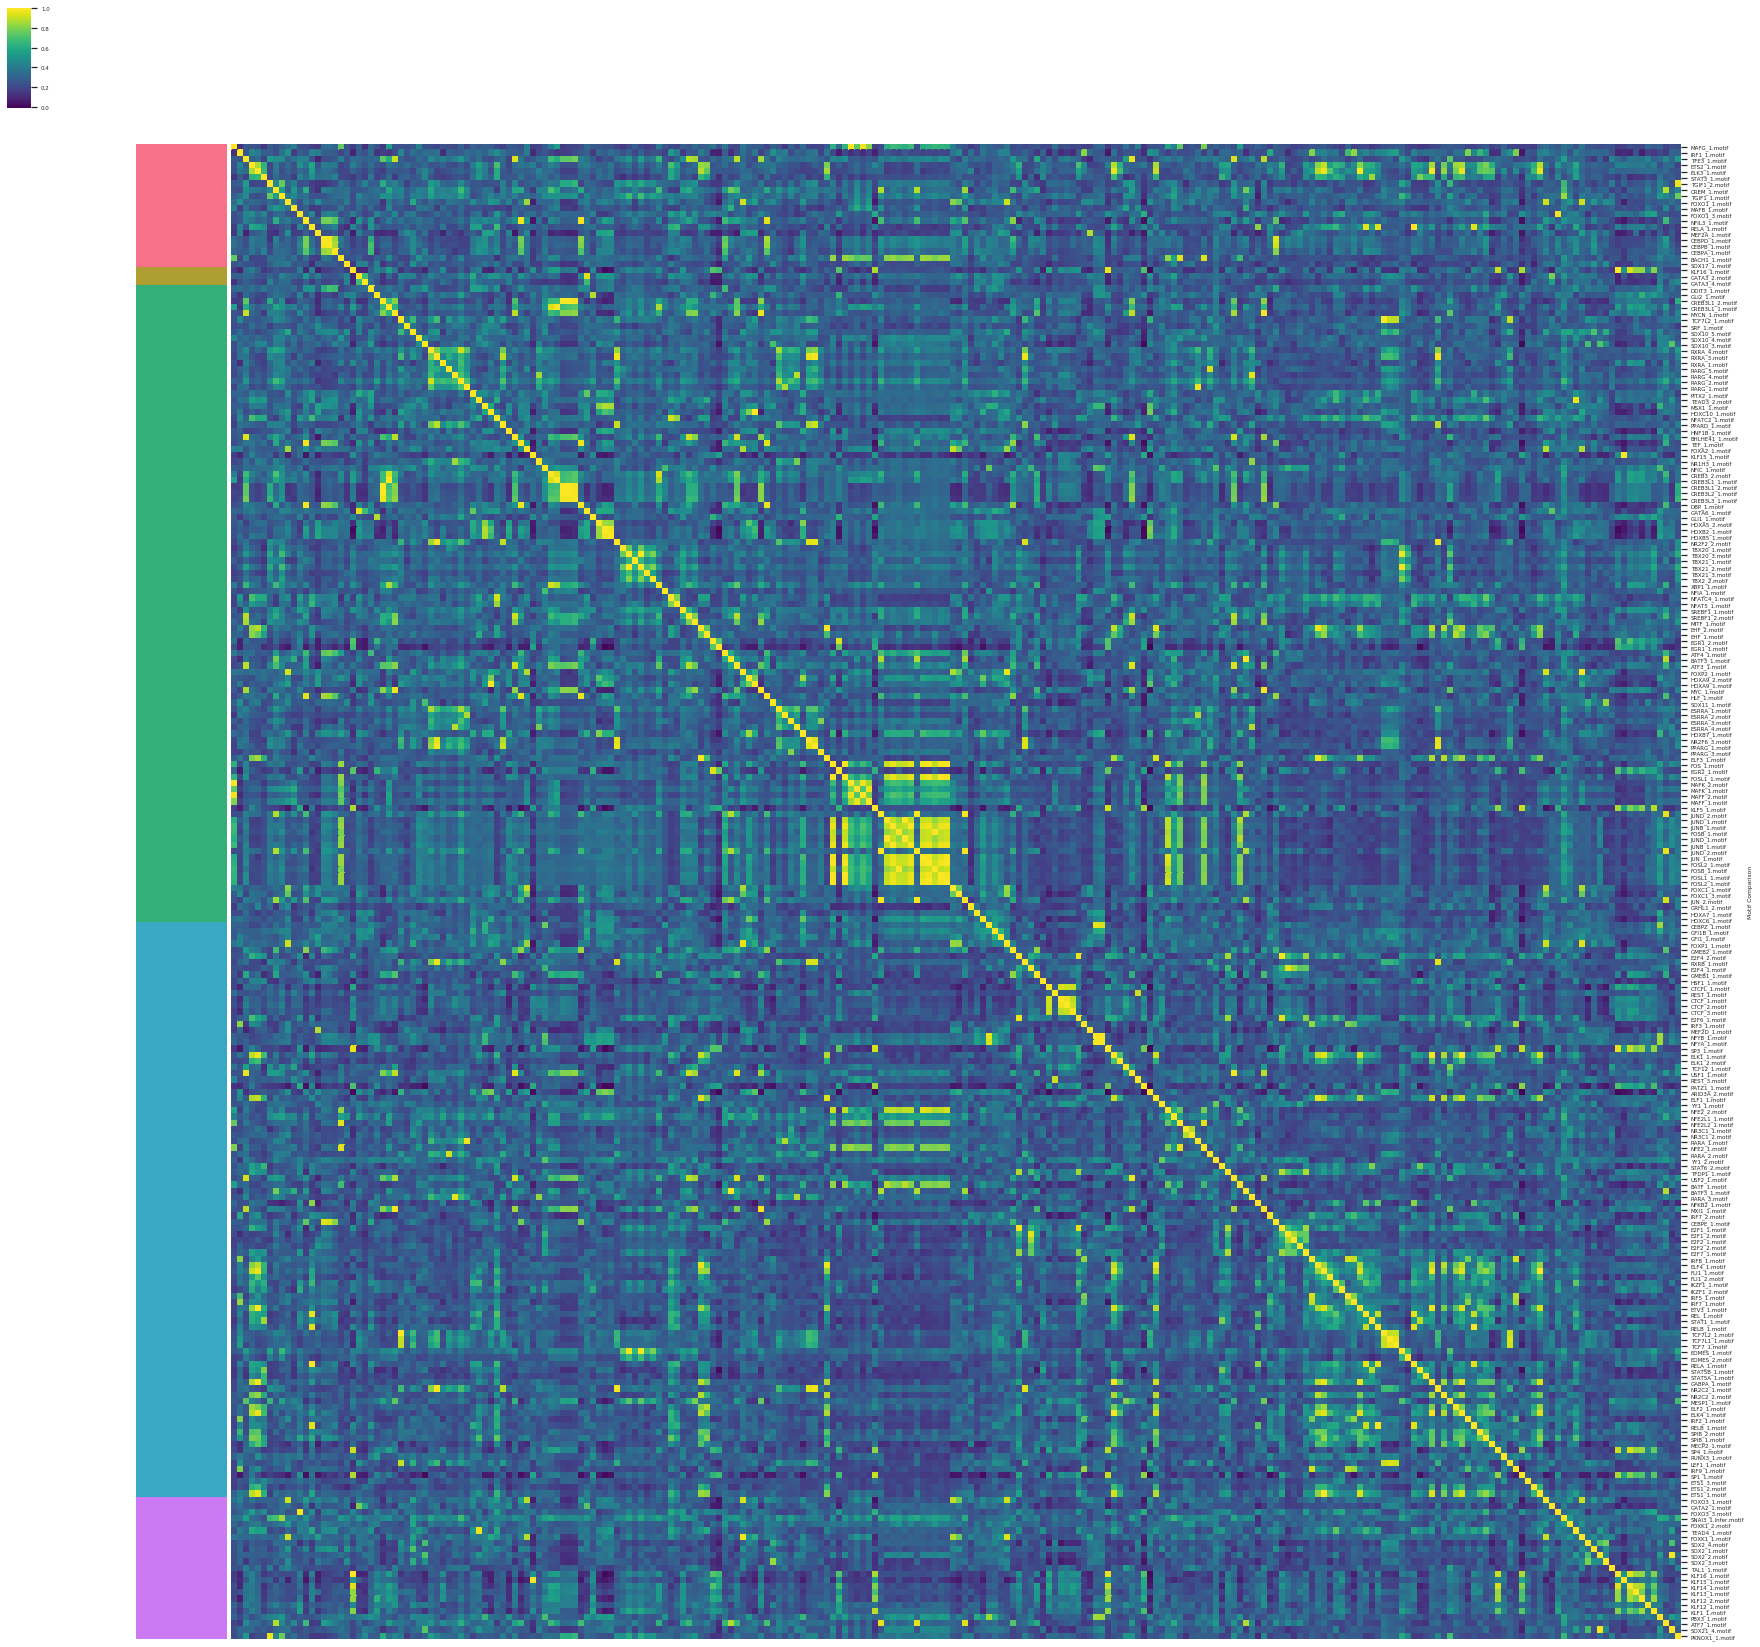

In [176]:
sns.set(font_scale=0.5)
sns.clustermap(corr_sub.drop('Cluster', axis = 1), row_colors=corr_sub.Cluster.map(colors).tolist(), figsize=(30,30),cmap="viridis", yticklabels=True, xticklabels=False,
               col_cluster=False, 
               row_cluster=False,
              rasterized=True)
plt.savefig('motif_non-cluster_map.pdf')

## Plot correlations per cluster

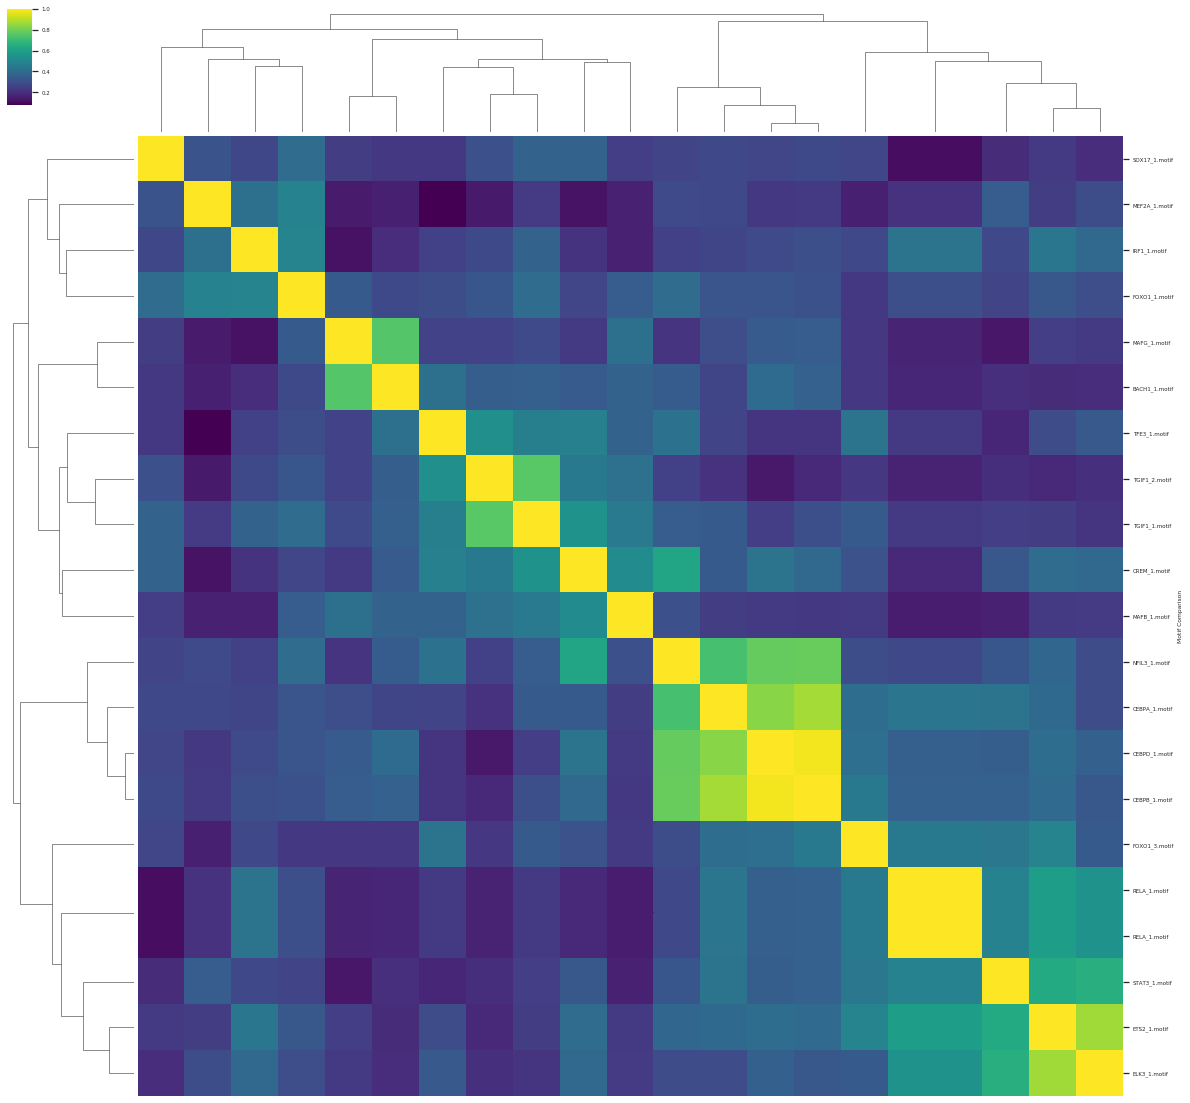

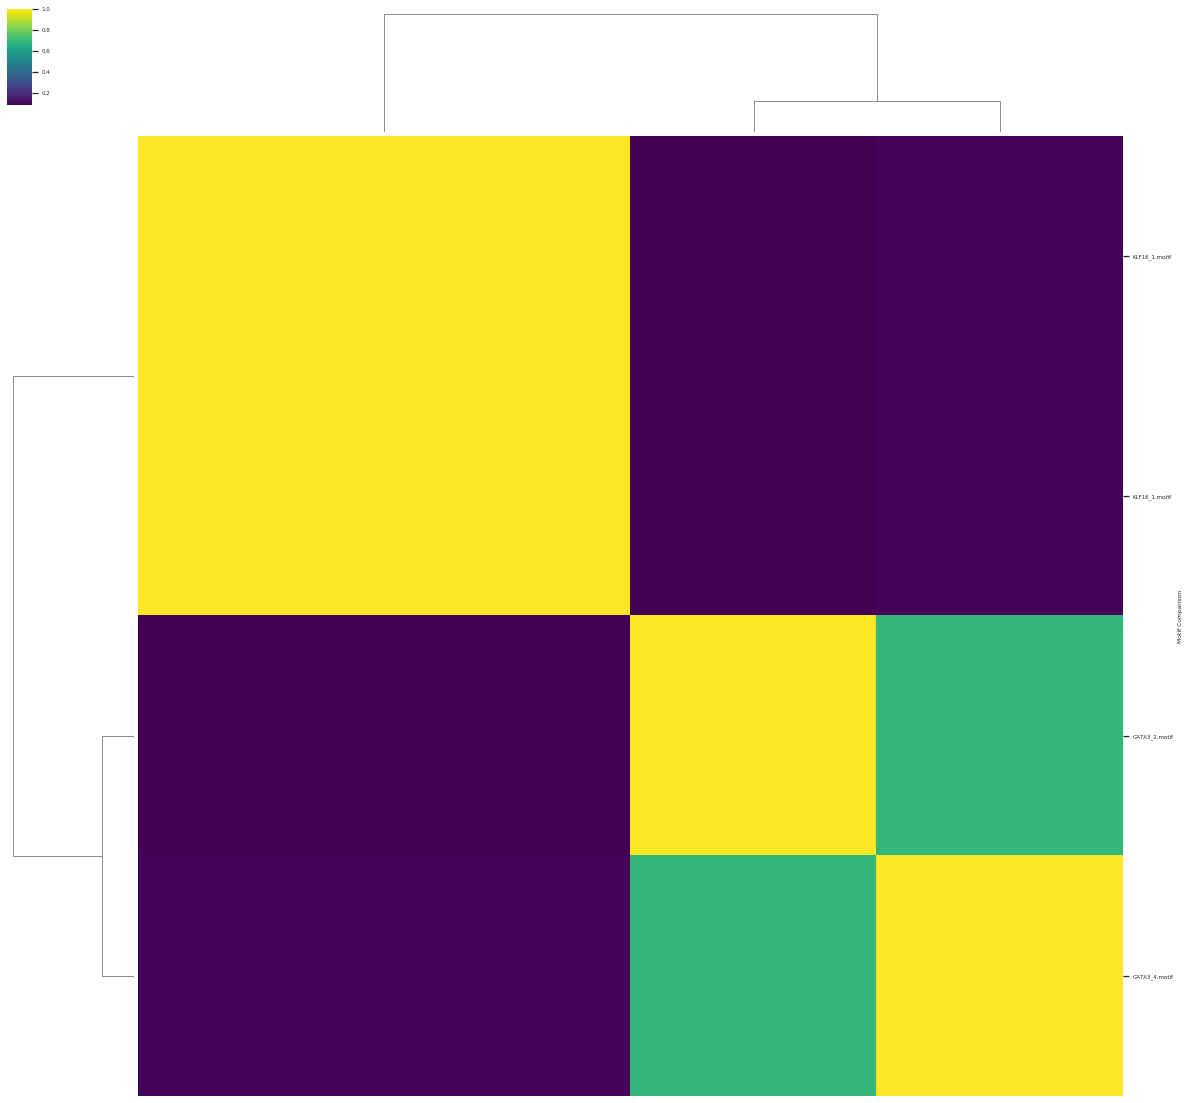

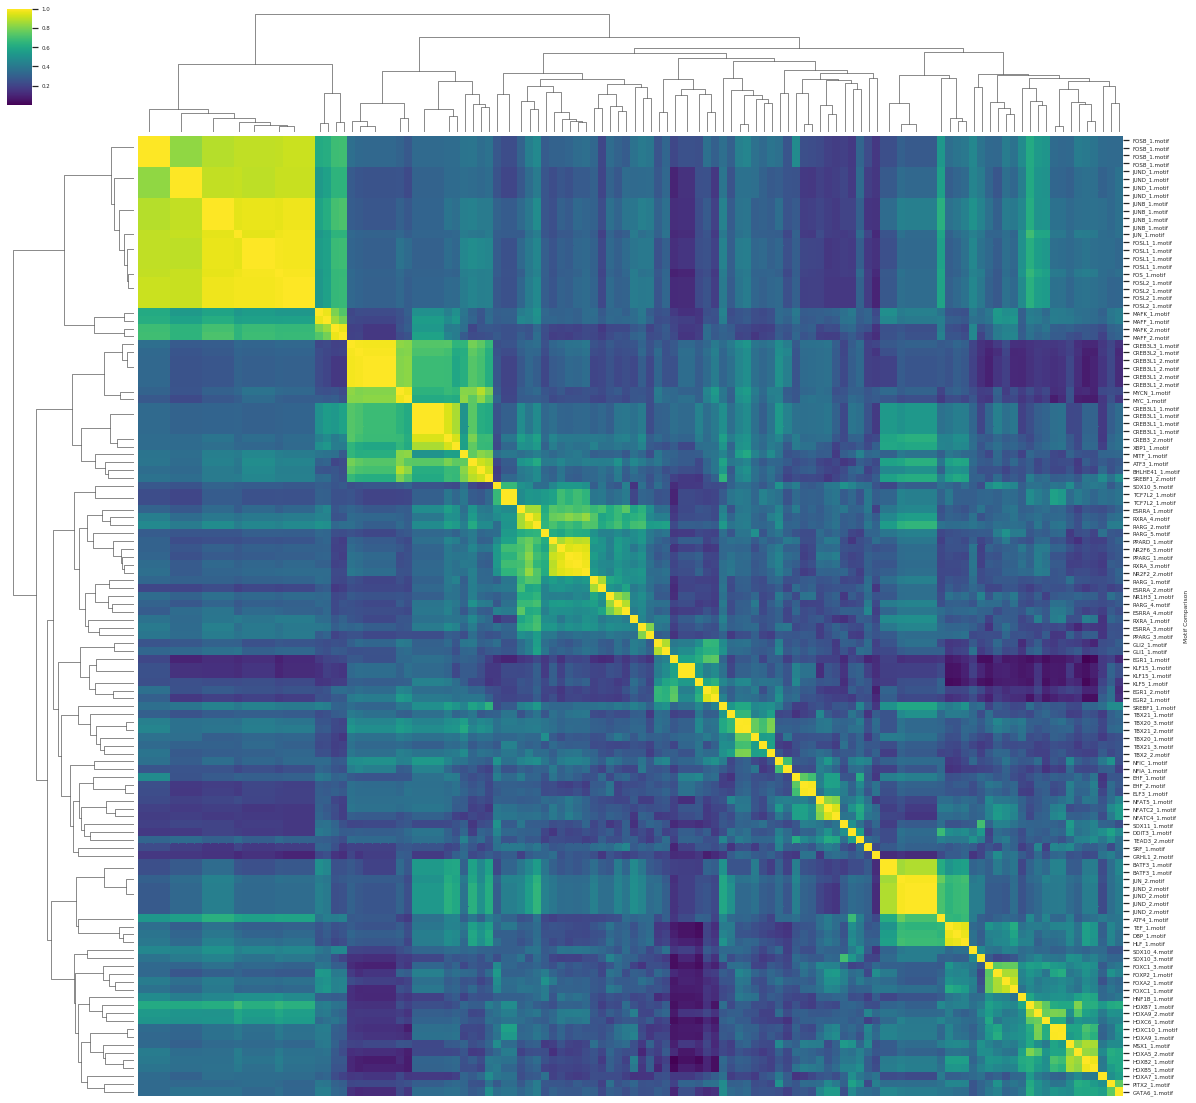

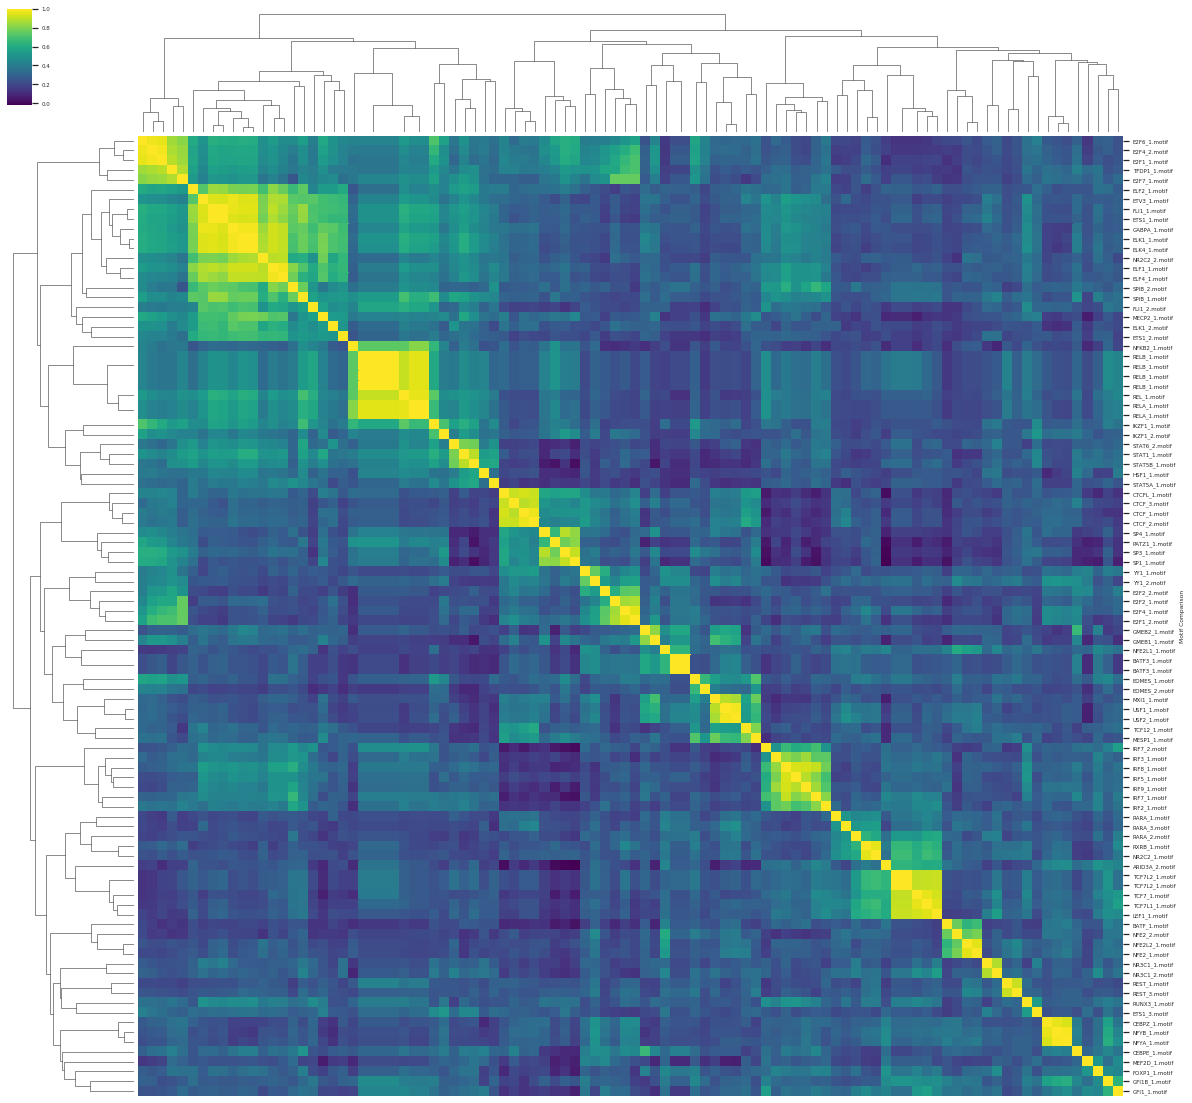

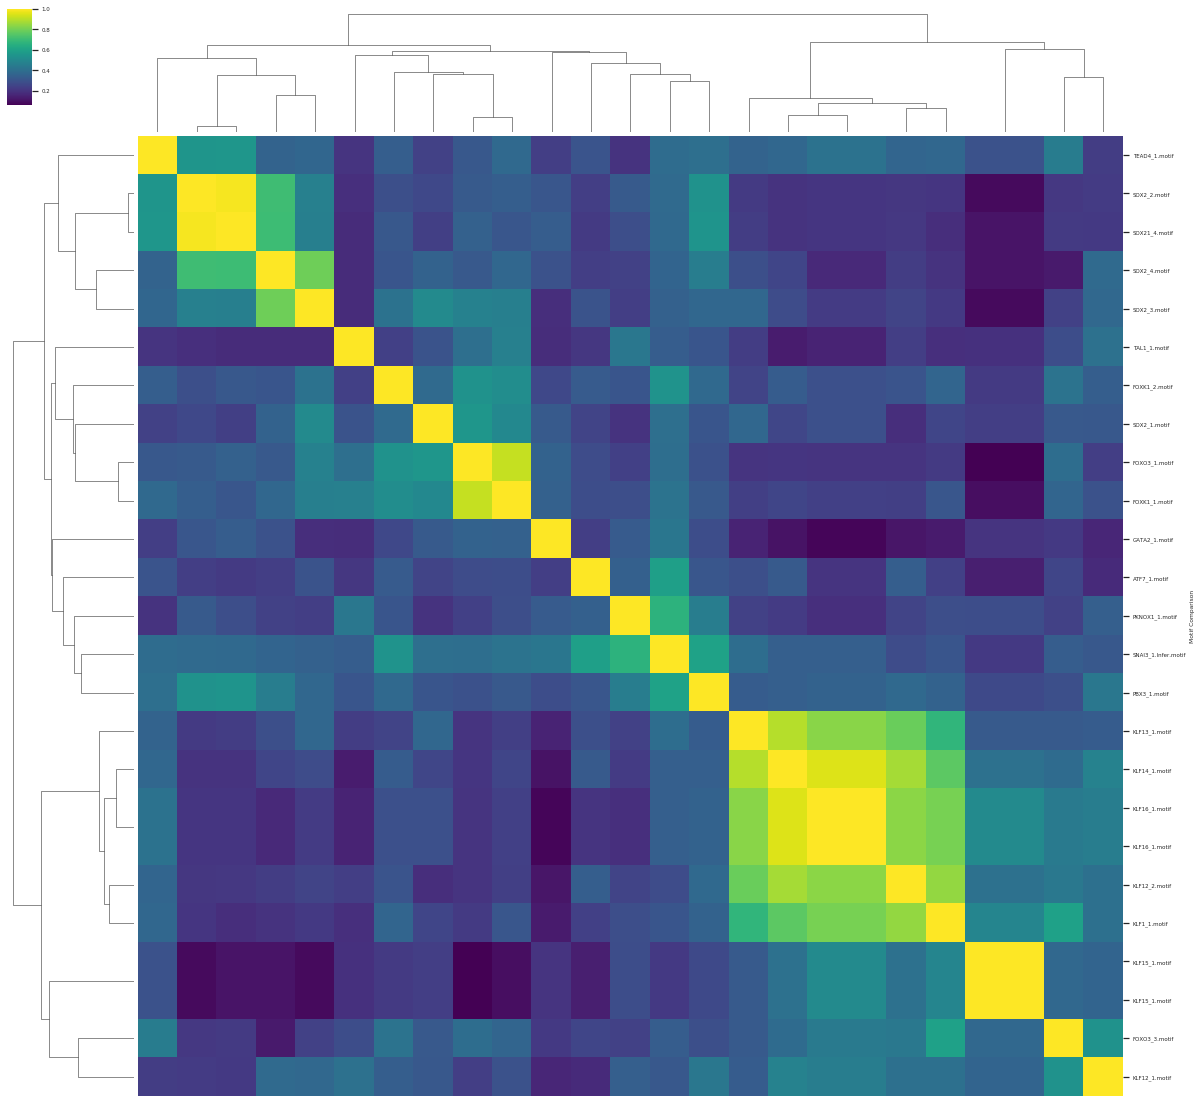

In [179]:
for i in [1,2,3,4,5]:
    motifs = corr_sub[corr_sub.Cluster == i].index

    sub = corr_sub.loc[motifs, motifs]

    sns.set(font_scale=0.5)
    cg = sns.clustermap(sub, figsize=(20,20),cmap="viridis", yticklabels=True, xticklabels=False,
                  rasterized=True)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.savefig('motif_correlation_cluster_{}.pdf'.format(i))